<a href="https://colab.research.google.com/github/yohanesnuwara/machine-learning/blob/master/real-case-studies/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbalanced Classification

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/machine-learning

Cloning into 'machine-learning'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 191 (delta 2), reused 0 (delta 0), pack-reused 181
Receiving objects: 100% (191/191), 747.26 KiB | 11.15 MiB/s, done.
Resolving deltas: 100% (81/81), done.


Upload mammography dataset.

In [0]:
# define the dataset location
filename = '/content/machine-learning/datasets/mammography.csv'
# load the csv file as a data frame
df = pd.read_csv(filename, header=None)

In [18]:
# summarize the shape of the dataset
print(df.shape)

(11183, 7)


Calculate percentage of data with positive cancer result (`0`) and negative `-1` 

In [19]:
import collections

# summarize the class distribution
target = df.values[:,-1]
counter = collections.Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class='-1', Count=10923, Percentage=97.675%
Class='1', Count=260, Percentage=2.325%


Histogram of each class (column)

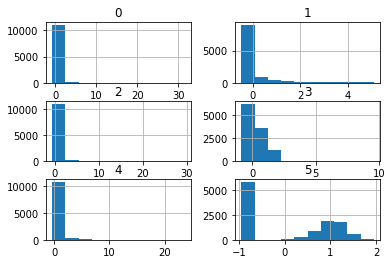

In [20]:
# histograms of all variables
df.hist()
plt.show()

Scatter plot matrix.

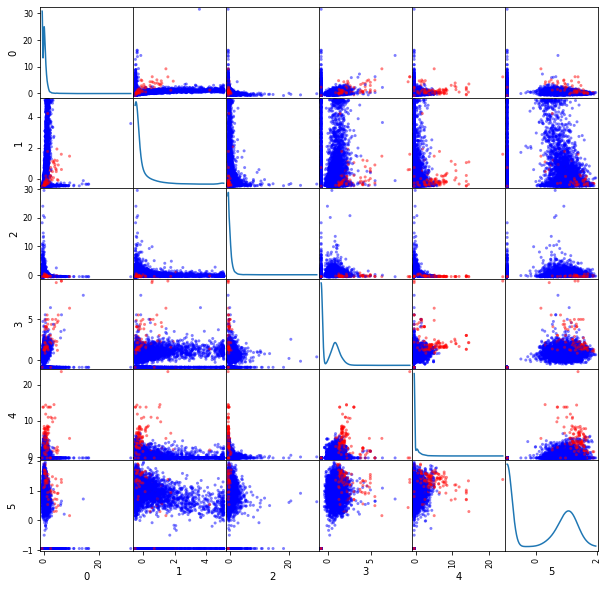

In [26]:
from pandas.plotting import scatter_matrix

# define a mapping of class values to colors
color_dict = {"'-1'":'blue', "'1'":'red'}
# map each row to a color based on the class value
colors = [color_dict[str(x)] for x in df.values[:, -1]]
# pairwise scatter plots of all numerical variables
scatter_matrix(df, diagonal='kde', color=colors, figsize=(10,10))

plt.show()

### Evaluate candidate ML model: **Stratified k-fold cross validation**

Load the dataset and split the columns into input and output variables

In [0]:
from sklearn.preprocessing import LabelEncoder

# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = pd.read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y

Evaluate a given model on the dataset and return a list of ROC AUC scores for each fold and repeat. ROC AUC (ROC curve) to compare models

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	return scores

A model that predicts the a random class in proportion to the base rate of each class will result in a ROC AUC of 0.5, the baseline in performance on this dataset. This is a so-called “no skill” classifier. Now, set the “strategy” argument to ‘stratified‘.

In [0]:
from sklearn.dummy import DummyClassifier

# define the reference model
model = DummyClassifier(strategy='stratified')

Report the mean and standard deviation of the ROC AUC scores directly.

In [39]:
from numpy import mean
from numpy import std

# define the location of the dataset
full_path = '/content/machine-learning/datasets/mammography.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, collections.Counter(y))
# define the reference model
model = DummyClassifier(strategy='stratified')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean ROC AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

(11183, 6) (11183,) Counter({0: 10923, 1: 260})
Mean ROC AUC: 0.502 (0.016)
